<a href="https://colab.research.google.com/github/CameronKenworthyCode/python/blob/main/LOG_ANALYZER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OLD

In [ ]:
# determine encoding of log dump
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()
for line in open('drive/My Drive/NEWICC/Dump_IncidentLog.csv', 'rb'):
  detector.feed(line)
  if detector.done:
    break
detector.close()

print(detector.result)

#SETUP

###notebook

In [ ]:
#initialize notebook
import pandas as pd
import numpy as np
from datetime import datetime as dt
import re

!pip install pykml
from pykml.factory import KML_ElementMaker as KML

!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
gdrive = GoogleDrive(gauth)

local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

drive.mount('/content/drive/', force_remount=True)

file_list = gdrive.ListFile(
    {'q': "'1fZ-p58kmyIkYnopyDITA0B8tW0me8FXh' in parents and trashed=False"}).GetList() 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive/


In [ ]:
for file in file_list:
  print(file['title'])

LOG_ANALYZER.ipynb
map.ipynb
EarthPointTownships_220025.kml
app outline
centerfire_cats.csv
wildfire_compiled.csv
centerfires_cats.csv
Dump_CenterFireCats.csv
Dump_StatusHistory.csv
Dump_Status.csv
Dump_Resource.csv
Dump_IncidentType.csv
Dump_IncidentSubTypes.csv
Dump_CenterFireSubCats.csv
Dump_SpecCause.csv
Dump_StatCause.csv
Setting Up WildCAD - CAR edits.docx
Dump_IncidentIC.csv
Dump_PlaceName.csv
Dump_MilePosts.csv
Dump_Location.csv
Dump_IncidentLog.csv
Dump_IncidentCenterFires.csv
Dump_Incident.csv
Dump_IDL.csv
Dump_Hazards.csv
Dump_FireInfo.csv
Dump_DailyLog.csv
IA_NEWICC_V4.01.07.veg
IA_NEWICC_V4.01.07.veg
boom bap.exe


In [ ]:
#load lists
wildfire_compiled = pd.read_csv('drive/My Drive/NEWICC/wildfire_compiled.csv', index_col=0)
centerfires_cats = pd.read_csv('drive/My Drive/NEWICC/centerfires_cats.csv', index_col=0)

In [ ]:
dump_incident_ic = pd.read_csv('drive/My Drive/NEWICC/Dump_IncidentIC.csv', encoding='cp1252')
dump_resource = pd.read_csv('drive/My Drive/NEWICC/Dump_Resource.csv', encoding='cp1252')
dump_placename = pd.read_csv('drive/My Drive/NEWICC/Dump_PlaceName.csv', encoding='cp1252')
dump_mileposts = pd.read_csv('drive/My Drive/NEWICC/Dump_MilePosts.csv', encoding='cp1252')
dump_incident = pd.read_csv('drive/My Drive/NEWICC/Dump_Incident.csv', encoding='cp1252')
dump_location = pd.read_csv('drive/My Drive/NEWICC/Dump_Location.csv', encoding='cp1252')
dump_incident_center_fires = pd.read_csv('drive/My Drive/NEWICC/Dump_IncidentCenterFires.csv', encoding='cp1252')
dump_idl = pd.read_csv('drive/My Drive/NEWICC/Dump_IDL.csv', encoding='cp1252')
dump_hazards = pd.read_csv('drive/My Drive/NEWICC/Dump_Hazards.csv', encoding='cp1252')
dump_fireinfo = pd.read_csv('drive/My Drive/NEWICC/Dump_FireInfo.csv', encoding='cp1252')
dump_daily_log = pd.read_csv('drive/My Drive/NEWICC/Dump_DailyLog.csv', encoding='cp1252')
dump_incident_log = pd.read_csv('drive/My Drive/NEWICC/Dump_IncidentLog.csv', encoding='cp1252')
dump_spec_cause = pd.read_csv('drive/My Drive/NEWICC/Dump_SpecCause.csv', encoding='cp1252')
dump_stat_cause = pd.read_csv('drive/My Drive/NEWICC/Dump_StatCause.csv', encoding='cp1252')
dump_incident_type = pd.read_csv('drive/My Drive/NEWICC/Dump_IncidentType.csv', encoding='cp1252')
dump_incident_subtype = pd.read_csv('drive/My Drive/NEWICC/Dump_IncidentSubTypes.csv', encoding='cp1252')
dump_centerfire_subcats = pd.read_csv('drive/My Drive/NEWICC/Dump_CenterFireSubCats.csv', encoding='cp1252')
dump_status_history =  pd.read_csv('drive/My Drive/NEWICC/Dump_StatusHistory.csv', encoding='cp1252')
dump_status =  pd.read_csv('drive/My Drive/NEWICC/Dump_Status.csv', encoding='cp1252')
dump_centerfire_cats = pd.read_csv('drive/My Drive/NEWICC/Dump_CenterFireCats.csv', encoding='cp1252')

dumps = {
   "incident_ic": dump_incident_ic,
   "resource": dump_resource,
   "placename": dump_placename,
   "mileposts": dump_mileposts,
   "incident": dump_incident,
   "location": dump_location,
   "incident_center_fires": dump_incident_center_fires,
   "idl": dump_idl,
   "hazards": dump_hazards,
   "fireinfo": dump_fireinfo,
   "daily_log": dump_daily_log,
   "incident_log": dump_incident_log,
   "status_history": dump_status_history,
   "incident_type": dump_incident_subtype,
   "incident_sub_type": dump_incident_subtype,
   "centerfire_cats": dump_centerfire_cats,
   "centerfire_subcats": dump_centerfire_subcats,
   "spec_cause": dump_spec_cause,
   "stat_cause": dump_stat_cause,
   "status": dump_status

}

test = 17445

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (32,44,50,52,70,81,85,86,87,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##Functions

###print_log()

In [ ]:
def print_log(df):
  for i in range(len(df)):
    row = df.iloc[i]
    print(row['LogDate'], '\nLogFrom:', row['LogFrom'],'\nLogTo:  ', row['LogTo'], '\n',row['Entry'], '\n------------------------------------------------------------------------') 

###get_incident_df()

In [ ]:
def get_incident_df(ID):
  part = dump_incident_log.query('IncidentID == @ID')
  incident = dump_incident.query("IncidentID == @ID")
  incidentnum = incident['IncidentNum'].values
  incidentname = incident['IncidentName'].values
  title_str = incidentname[0] + ' | ' + str(incidentnum[0])
  log = {"LogDate": part['LogDate'].reset_index(drop=True),
        "LogFrom": part['LogFrom'].reset_index(drop=True),
        "LogTo": part['LogTo'].reset_index(drop=True),
        "Entry": part['Describe'].reset_index(drop=True)}
  return pd.DataFrame(log).sort_values(by='LogDate').reset_index(drop=True)

###statID(), specID() resourceID(), statusID(), centerfireID(), resourceType(), incidentType()

In [ ]:
KCT = {
    0: {'type':'N/A', 'subtype':'N/A'},
    1: {'type':'Airtanker', 'subtype':'Type 1'},
    2: {'type':'Airtanker', 'subtype':'Type 2'},
    3: {'type':'Airtanker', 'subtype':'Type 3/4'},
    4: {'type':'Fixed Wing', 'subtype':'Air Attack Platform'},
    5: {'type':'Fixed Wing', 'subtype':'Lead Plane'},
    6: {'type':'Fixed Wing', 'subtype':'Recon Plane'},
    7: {'type':'Fixed Wing', 'subtype':'Smokejumper'},
    8: {'type': 'Helicopter', 'subtype': 'Type 1'},
    9: {'type': 'Helicopter', 'subtype': 'Type 2'},
    10: {'type': 'Helicopter', 'subtype': 'Type 3'},
    11: {'type': 'Handcrew', 'subtype': 'Type 1'},
    12: {'type': 'Handcrew', 'subtype': 'Type 2'},
    13: {'type': 'Handcrew', 'subtype': 'Type 2/IA'},
    14: {'type': 'Handcrew', 'subtype': 'Other'},
    15: {'type': 'Module', 'subtype': 'Helitack'},
    16: {'type': 'Overhead', 'subtype': 'Firefighter'},
    17: {'type': 'Overhead', 'subtype': 'Smokejumper'},
    18: {'type': 'Module', 'subtype': 'Rappeller'},
    19: {'type': 'Dozer', 'subtype': 'Type 1'},
    20: {'type': 'Dozer', 'subtype': 'Type 2'},
    21: {'type': 'Dozer', 'subtype': 'Type 3'},
    25: {'type': 'Engine', 'subtype': 'Other'},
    26: {'type': 'Boat', 'subtype': 'Boat'},
    27: {'type': 'Utility Vehicle', 'subtype': 'High Mobility'},
    28: {'type': 'Utility Vehicle', 'subtype': 'Low Ground Pressure'},
    29: {'type': 'Tractor Plow', 'subtype': 'Trencher'},
    30: {'type': 'Tractor Plow', 'subtype': 'Type 1'},
    31: {'type': 'Tractor Plow', 'subtype': 'Type 2/3'},
    32: {'type': 'Tractor Plow', 'subtype': 'Type 4/5/6'},
    33: {'type': 'Watertender', 'subtype': 'Type 1'},
    34: {'type': 'Watertender', 'subtype': 'Type 2'},
    35: {'type': 'Watertender', 'subtype': 'Type 3'},
    36: {'type': 'Overhead', 'subtype': 'Operations Overhead'},
    51: {'type': 'Engine', 'subtype': 'Type 1'},
    52: {'type': 'Engine', 'subtype': 'Type 2'},
    53: {'type': 'Engine', 'subtype': 'Type 3'},
    54: {'type': 'Engine', 'subtype': 'Type 4'},
    55: {'type': 'Engine', 'subtype': 'Type 5'},
    56: {'type': 'Engine', 'subtype': 'Type 6'},
    57: {'type': 'Engine', 'subtype': 'Type 7'},
    58: {'type': 'Fixed Wing', 'subtype': 'Aerial Supervision'},
    81: {'type': 'Module', 'subtype': 'Aerial Supervision'},
    82: {'type': 'Module', 'subtype': 'Fuels'},
    83: {'type': 'Module', 'subtype': 'Overhead Squad'},
    84: {'type': 'Module', 'subtype': 'Suppression'},
    86: {'type': 'Module', 'subtype': 'Wildland Fire Type 1'},
    87: {'type': 'Module', 'subtype': 'Wildland Fire Type 2'},
    }


def statID(ID):
  return dump_stat_cause.query("StatCauseID == @ID")['Describe'].values[0]

def specID(ID):
  return dump_spec_cause.query("SpecCauseID == @ID")['Describe'].values[0]

def resourceID(ID):
  return dump_resource.query("ResourceID == @ID")["ResourceCode"].values[0]

def resourceType(ID, only=None):
  if only == 'type':
    return KCT[dump_resource.query("ResourceID == @ID")['KCTID'].values[0]]['type']
  
  else:
    return KCT[dump_resource.query("ResourceID == @ID")['KCTID'].values[0]]

def statusID(ID, only=None):
  status =  dump_status.query("StatusID == @ID")
  describe = status["Describe"].values[0]
  available = status['Available'].values[0]
  on_incident = status["OnIncident"].values[0]
  if only == 'on_incident':
    return on_incident
  else:
    return {"status": describe, "available": available, "on_incident": on_incident}

def incidentType(ID):
  return dump_incident_type.query("IncidentTypeID == @ID")['Describe'].values[0]

def centerfireID(tab, catID):
  return dump_centerfire_cats.query("CenterFireTabID == @tab and CenterFireCatID == @catID")['Describe'].values[0]


###count_response()

In [ ]:
def count_response(ID):
  incident = dump_status_history.query("IncidentID == @ID").sort_values(by="StatusDate")
  incident = incident.drop(columns=['StatusDate', 'DispatcherID', 'Describe', 'StatusHistoryID']).drop_duplicates()

  incident['ResourceType'] = pd.DataFrame(incident['ResourceID'].apply(resourceType, only='type'))
  incident = incident.query('StatusID == 3')

  try: 
    response_dict = dict(incident['ResourceType'].value_counts().drop(labels='N/A'))
  except:
    response_dict = dict(incident['ResourceType'].value_counts())

  response_columns = {'Airtanker': 0, 'Fixed Wing': 0, 'Helicopter': 0, 'Handcrew': 0,
       'Module': 0, 'Overhead': 0, 'Dozer': 0, 'Engine': 0, 'Boat': 0, 'Utility Vehicle': 0,
       'Tractor Plow':0, 'Watertender':0}
  
  for key in response_dict:
    response_columns[key] = response_dict[key]

  return response_columns

In [ ]:
response_columns = {
    'Airtanker': 0, 'Fixed Wing': 0, 'Helicopter': 0, 'Handcrew': 0,
       'Module': 0, 'Overhead': 0, 'Dozer': 0, 'Engine': 0, 'Boat': 0, 'Utility Vehicle': 0,
       'Tractor Plow':0, 'Watertender':0, 'Waterbender':0}




pd.DataFrame.from_dict(response_columns.items()).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Airtanker,Fixed Wing,Helicopter,Handcrew,Module,Overhead,Dozer,Engine,Boat,Utility Vehicle,Tractor Plow,Watertender,Waterbender
1,0,0,0,0,0,0,0,0,0,0,0,0,0


###incident_duration()

In [ ]:
def incident_duration(ID):
  try:
    start = dt.strptime(dump_incident_log.query('IncidentID == @ID').sort_values(by='LogDate')['LogDate'].iloc[0], '%Y-%m-%d %H:%M:%S')
  except:
    return {'days': None, 'hours': None}
  
  try:
    end = dt.strptime(dump_fireinfo.query('IncidentID == @ID')['OutDate'].values[0], '%Y-%m-%d %H:%M:%S')
  except:
    return {'days': None, 'hours': None}
  to_out_result = end - start
  
  try:
    start = dt.strptime(dump_incident_log.query('IncidentID == @ID').sort_values(by='LogDate')['LogDate'].iloc[0], '%Y-%m-%d %H:%M:%S')
  except:
    return {'days': None, 'hours': None}
  
  try:
    end = dt.strptime(dump_fireinfo.query('IncidentID == @ID')['ControlDate'].values[0], '%Y-%m-%d %H:%M:%S')
  except:
    return {'days': None, 'hours': None}
  to_control_result = end - start

  return {'days_to_out': to_out_result.days + round(to_out_result.seconds/3600/24, 2),
          'days_to_control': to_control_result.days + round(to_control_result.seconds/3600/24, 2)}

###compile_incident_meta()

In [ ]:
def compile_incident_meta(ID):
  incident = get_incident_df(ID)

  #return
  log_len = len(incident)
  drop_columns = ['ICID', 'IncidentID', 'ICEffective', 'DispatcherID', 'ICComment']
  incident_ic_data  = dump_incident_ic.query('IncidentID == @ID').sort_values(by='ICDate')
  
  #return
  incident_ic_data = incident_ic_data.drop(columns=drop_columns).reset_index(drop=True).query('IsTrainee == False')
  ic_count = len(incident_ic_data['ICName'].unique())
  
  
  drop_columns = list(dump_fireinfo.isna().sum().sort_values()[17:].index)
  drop_columns += ['IAcres', 'Elevation', 'IComplexity', 'InitialStrategyID', 'LastUpdate', 'SizeClass', 'IJurisdiction']
  #return
  fireinfo_data = dump_fireinfo.query('IncidentID == @ID').drop(drop_columns,axis=1).reset_index(drop=True)

  #return
  duration = incident_duration(ID)

  #return
  response = count_response(ID)

  #return


  #return
  try:
    jurisdiction = dump_fireinfo.query('IncidentID == @ID')['SubUnitCode'].values[0]
  except:
    jurisdiction = 'other'
  
  if jurisdiction == '3-NC':
    jurisdiction = 'NC'
  if jurisdiction == '4-AR':
    jurisdiction = 'AR'
  if jurisdiction == '1-HI':
    jurisdiction = 'HI'
  if jurisdiction == '2-SO':
    jurisdiction = 'SO'
  
  #return
  percent = (dump_fireinfo.query('IncidentID == @test').size - dump_fireinfo.query('IncidentID == @test').isna().sum().sum())
  center_fires = round(percent/28, 2)
  
  #return
  size = dump_fireinfo.query('IncidentID == @ID')['Acres'].values[0]

  incident_type = incidentType(dump_incident.query('IncidentID == @ID')['IncidentTypeID'].values[0])

  try:
    contain_date = dt.strptime(fireinfo_data['ContainDate'].values[0], '%Y-%m-%d %H:%M:%S')
  except:
    contain_date = None
  
  try:
    control_date = dt.strptime(fireinfo_data['ControlDate'].values[0], '%Y-%m-%d %H:%M:%S')
  except:
    control_date = None

  incident_meta = dump_incident.query('IncidentID == @ID')
  incident_name = incident_meta['IncidentName'].values[0]
  incident_num = incident_meta['IncidentNum'].values[0]
  incident_year = dt.strptime(incident_meta['IncidentDate'].values[0], '%Y-%m-%d %H:%M:%S').year

  #icf = dump_incident_center_fires.query('IndicentID == @ID')
  #icf = centerfireID(icf['CenterFireTabID'], icf['CenterFireCatID'])


  try:
    general_cause = statID(fireinfo_data['StatCauseID'].values[0])
  except:
    general_cause = None
  
  try:
    specific_cause = specID(fireinfo_data['SpecCauseID'].values[0])
  except:
    specific_cause = None

  return {'global_id': ID,
          'incident_name': incident_name,
          'incident_number': incident_num,
          'incident_year': incident_year,
          'incident_type': incident_type,
          'acres_final': size,
          'log_len': log_len,
          'general_cause': general_cause, 
          'specific_cause': specific_cause,
          'time_to_out': duration['days_to_out'],
          'time_to_control': duration['days_to_control'],
          'contain_date': contain_date,
          'control_date': control_date,
          'out_date': fireinfo_data['OutDate'].values[0],
          'jurisdiction': jurisdiction,
          'ic_count': ic_count,
          'Airtanker': response['Airtanker'], 
          'Fixed Wing': response['Fixed Wing'], 
          'Helicopter': response['Helicopter'], 
          'Handcrew': response['Handcrew'],
          'Module': response['Module'], 
          'Overhead': response['Overhead'], 
          'Dozer': response['Dozer'], 
          'Engine': response['Engine'], 
          'Boat': response['Boat'], 
          'Utility Vehicle': response['Utility Vehicle'],
          'Tractor Plow': response['Tractor Plow'], 
          'Watertender': response['Watertender']
          }



###tokenize_log()

In [ ]:
import re

legal_regex = [re.compile(r'(T\d\d) (R\d\d) (S\d\d)'),
               re.compile(r'(T\d\d) (R\d\d) (S\d)'),  
               re.compile(r'(\d\d)/(\d\d)/(\d\d)'),
               re.compile(r'(\d\d)/(\d\d)/(\d)'),
               re.compile(r'(T\d\d)/(R\d\d)/(S\d\d)'),
               re.compile(r'(T\d\d)/(R\d\d)/(S\d)'),
               re.compile(r'(T\d\d)-(R\d\d)-(S\d\d)'),
               re.compile(r'(T\d\d)-(R\d\d)-(S\d)'),
               re.compile(r'(T\d\d):(R\d\d):(S\d\d)'),
               re.compile(r'(T\d\d):(R\d\d):(S\d)'),
               ]

unit_regex = [re.compile(r'(\D\D) (\d\d)'), #AR 64
              re.compile(r'(\D\D) (\d\d\d)'), #
              re.compile(r'(\D\D) (\d\d\d\d)'), #AR 7401
              re.compile(r'(\D\D) (\d\d\d\d\d)'), 
              re.compile(r'(\D\D) (\d\d)\d\d\d\d'),
              re.compile(r'(\D\D\D) (\d\d)'), #EGR 20
              re.compile(r'(\D\D\D) (\d)'), #DIV 1
              re.compile(r'(\D) (\d\d\d\d)'), #C 6201
              ]

def tokenize_log(entries): #pass it pandas.Series
  return

In [ ]:
incident = get_incident_df(19166)
legal_regex = re.compile(r'(T\d\d) (R\d\d) (S\d\d)')
legal_regex.search(incident['Entry'][0])

<re.Match object; span=(0, 11), match='T29 R44 S20'>

In [ ]:
char = re.compile(r'(\D\D) (\d\d)')
char.search('Aa BB')

In [ ]:
for regex in legal_regex:
  print(regex.search('28/42/30'))

TypeError: ignored

In [ ]:
help(legal_regex[1].search('28/42/45'))

#GENERATE LISTS AND STATS

###centerfire_cats

In [ ]:
dataframes = []

for i in range(len(wildfire_compiled)):
  print(i)
  row = wildfire_compiled.iloc[i]
  incident = row['global_id']
  icf = dump_incident_center_fires.query('IncidentID == @incident').reset_index(drop=True)
  try:
    icf['Category'] = icf.apply(lambda x: centerfireID(x['CenterFireTabID'], x['CenterFireCatID']), axis=1)
    icf['Year'] = icf.apply(lambda x: dt.strptime(dump_incident[dump_incident['IncidentID'] == x['IncidentID']]['IncidentDate'].values[0], '%Y-%m-%d %H:%M:%S').year, axis=1)
  except:
    continue
  dataframes.append(icf)

centerfires_cats = pd.concat(dataframes, axis=0).reset_index(drop=True)
centerfires_cats

In [ ]:
centerfires_cats.to_csv('centerfires_cats.csv')
!cp centerfires_cats.csv "drive/My Drive/NEWICC/"

In [ ]:
#get lists of spec causes for each year

years = list(centerfires_cats['Year'].unique())
year_entries = list([[]]*len(years))
cause_dict = dict(zip(years, year_entries))
for year in years:
  if year == 2021:
    cause_dict[year] = list(centerfires_cats.query('Year == @year and Category == "Specific Cause"')['Describe'].unique())
  else:
    cause_dict[year] = list(centerfires_cats.query('Year == @year and Category == "Primary Fuel"')['Describe'].unique())

In [ ]:
stat_cause_dict {
    0: [],
    1: ['1- Lightning', ],
    2:,
    3: ['4 - Smoker'],
    4: ['3 - Recreation', ],
    5: ['5-Debris Burning', ],
    6: ['8 - Railroad'],
    7:,
    8: ['7 - Children'],
    9:,
}

In [ ]:
centerfires_cats

,IncidentID,CenterFireTabID,CenterFireCatID,Describe,Category,Year
0,4125,1,3,NaN,Adjacent Fuel,2011
1,4125,1,4,NaN,Character,2011
2,4125,1,5,NaN,Flame Length,2011
3,4125,1,6,NaN,Slope Position,2011
4,4125,2,3,7/9/11 CK,Sp Cause Detail,2011
...,...,...,...,...,...,...
133464,24825,2,3,5-Debris Burning,Sp Cause Detail,2021
133465,24825,2,4,Burning w/o permit,Debris-Permit Use,2021
133466,24825,2,5,Other,Debris-Specific,2021
133467,24825,2,6,ForestFire haz-abate,Debris-Purpose,2021


In [ ]:
cause_dict[2016]


In [ ]:
dump_stat_cause

In [ ]:
centerfires_cats

,IncidentID,CenterFireTabID,CenterFireCatID,Describe,Category,Year
0,4125,1,3,NaN,Adjacent Fuel,2011
1,4125,1,4,NaN,Character,2011
2,4125,1,5,NaN,Flame Length,2011
3,4125,1,6,NaN,Slope Position,2011
4,4125,2,3,7/9/11 CK,Sp Cause Detail,2011
...,...,...,...,...,...,...
133464,24825,2,3,5-Debris Burning,Sp Cause Detail,2021
133465,24825,2,4,Burning w/o permit,Debris-Permit Use,2021
133466,24825,2,5,Other,Debris-Specific,2021
133467,24825,2,6,ForestFire haz-abate,Debris-Purpose,2021


###wildfire_incident, wildfire_compiled

In [ ]:
wildfire_incident.iloc[5640]

IncidentID                             24451
IncidentYear                            2021
IncidentNum                             2390
IncidentTypeID                             2
IncidentDate             2021-08-08 14:00:23
                                ...         
GetUpdates                               NaN
ConflictParentIRWINID                    NaN
ADSPermissionState                       NaN
JurisdictionalUnit                       NaN
LandownerCategory                        NaN
Name: 15737, Length: 94, dtype: object

In [ ]:
wildfire_compiled

,global_id,incident_name,incident_number,incident_year,incident_type,acres_final,log_len,general_cause,specific_cause,duration_days,...,Handcrew,Module,Overhead,Dozer,Engine,Boat,Utility Vehicle,Tractor Plow,Watertender,center_fires
0,4125,HOG LOG - BLM,2,2011,Wildfire,0.01,1,NaN,NaN,-0.06,...,0,0,0,0,0,0,0,0,0,0.79
1,4156,SOUTH HUNTER CREEK - NC,33,2011,Wildfire,5.00,7,Debris Burning,NaN,54.01,...,0,0,0,0,0,0,0,0,0,0.79
2,4158,LOOP - HI,35,2011,Wildfire,12.00,8,Debris Burning,NaN,10.94,...,0,0,0,0,0,0,0,0,0,0.79
3,4159,PLEASANT VALLEY - SO,36,2011,Wildfire,2.50,29,Debris Burning,NaN,24.82,...,0,0,0,0,2,0,0,0,0,0.79
4,4163,CHALK FLAT - NC,40,2011,Wildfire,5.00,6,Debris Burning,Field Burning,35.94,...,0,0,0,0,0,0,0,0,0,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,24814,ELOIKA PINE,2720,2021,Wildfire,0.40,26,Debris Burning,NaN,2.76,...,0,0,1,0,2,0,0,0,0,0.79
5633,24816,OUTER SPRINGDALE,2722,2021,Wildfire,2.00,24,Miscellaneous,NaN,NaN,...,0,0,1,0,2,0,0,0,0,0.79
5634,24808,KLEIN CREEK,2716,2021,Wildfire,0.10,32,Debris Burning,NaN,3.82,...,0,0,2,0,2,0,0,0,0,0.79
5635,24810,SIMILKAMEEN,2717,2021,Wildfire,1.95,72,Debris Burning,NaN,NaN,...,0,0,2,0,2,0,0,0,0,0.79


In [ ]:
#all actual fires in database
valid_subtypes = [21, 29, 39, 40, 148, 151, 97, 80]

for i in range(len(dump_incident_subtype)):
  row = dump_incident_subtype.iloc[i]
  if 'DNR Statistical' in row['Describe']:
    valid_subtypes.append(row['IncidentSubTypeID'])

wildfire_incident = dump_incident.query("IncidentTypeID == 2 and IncidentSubTypeID in @valid_subtypes")

list_of_dataframes = []

bad_entries = []
length = len(wildfire_incident)

for i in range(length):
  print(i/length)
  try:
    id = wildfire_incident.iloc[i]['IncidentID']
    if len(dump_incident_log.query('IncidentID == @id')) < 3:
      continue
  except:
    continue
  try:
    row = wildfire_incident.iloc[i]
    incident_id = row['IncidentID']
    try:
      dataframe = pd.DataFrame(compile_incident_meta(incident_id), index=[0])
      list_of_dataframes.append(dataframe)
    except:
      continue
  except:
    continue

wildfire_compiled = pd.concat(list_of_dataframes, axis=0).reset_index(drop=True)
wildfire_compiled.to_csv('wildfire_compiled.csv')
!cp wildfire_compiled.csv "drive/My Drive/"

In [ ]:
len(wildfire_compiled)

4198

In [ ]:
wildfire_compiled.query('time_to_control < 0 or time_to_out < 0')

,global_id,incident_name,incident_number,incident_year,incident_type,acres_final,log_len,general_cause,specific_cause,time_to_out,...,Helicopter,Handcrew,Module,Overhead,Dozer,Engine,Boat,Utility Vehicle,Tractor Plow,Watertender
0,4156,SOUTH HUNTER CREEK - NC,33,2011,Wildfire,5.0,7,Debris Burning,None,54.01,...,0,0,0,0,0,0,0,0,0,0
1,4158,LOOP - HI,35,2011,Wildfire,12.0,8,Debris Burning,None,10.94,...,0,0,0,0,0,0,0,0,0,0
3,4163,CHALK FLAT - NC,40,2011,Wildfire,5.0,6,Debris Burning,Field Burning,35.94,...,0,0,0,0,0,0,0,0,0,0
4,4164,SOUTH HARVEY CREEK - NC,41,2011,Wildfire,15.0,5,Debris Burning,Field Burning,35.88,...,0,0,0,0,0,0,0,0,0,0
5,4165,HUMES ROAD - NC,42,2011,Wildfire,6.0,9,Debris Burning,Field Burning,35.98,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,23777,LIGHTNING STUMP,1770,2021,Wildfire,0.1,13,Miscellaneous,Logging Line,0.73,...,0,0,0,0,0,1,0,0,0,0
3945,23945,BOULDER BEACH,1925,2021,Wildfire,0.1,4,NaN,NaN,3.73,...,0,0,0,0,0,1,0,0,0,0
3983,24100,HORSESHOE LAKE,2067,2021,Wildfire,0.1,12,Equipment Use,NaN,-0.03,...,0,0,0,1,0,0,0,0,0,0
4184,24784,HERRON CREEK PILE,2694,2021,Wildfire,0.1,8,Debris Burning,NaN,-0.02,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dump_fireinfo.query('IncidentID == 4156').columns


Index(['IncidentID', 'FireNum', 'SubUnitCode', 'SizeClass', 'Acres',
       'LandStatus', 'Wilderness', 'StatCauseID', 'SpecCauseID',
       'SubUnitFireNum', 'ContainDate', 'ControlDate', 'OutDate', 'IFuels',
       'IAcres', 'IWSpeed', 'IWDir', 'ISlope', 'IAspect', 'ISpread',
       'IStructures', 'Elevation', 'IJurisdiction', 'IComplexity', 'IAccess',
       'IHazards', 'InitialStrategyID', 'LastUpdate'],
      dtype='object')

In [ ]:
dump_fireinfo.query('IncidentID == 4156')

In [ ]:
#wildfire_compiled = pd.concat(list_of_dataframes, axis=0).reset_index(drop=True)
wildfire_compiled.to_csv('wildfire_compiled.csv')
!cp wildfire_compiled.csv "drive/My Drive/NEWICC/"

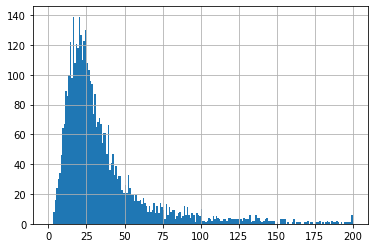

In [ ]:
wildfire_compiled['log_len'].hist(range=(0,200), bins=200)

In [ ]:
wildfire_compiled.query('log_len > 500')

,global_id,incident_name,incident_number,incident_year,incident_type,acres_final,log_len,general_cause,specific_cause,duration_days,...,Handcrew,Module,Overhead,Dozer,Engine,Boat,Utility Vehicle,Tractor Plow,Watertender,center_fires
1460,13433,TORODA MOUNTAIN - HI,789,2014,Wildfire,143.7,532,Miscellaneous,NaN,57.17,...,3,0,5,3,6,0,0,0,6,0.79
2234,15502,CARPENTER ROAD,1235,2015,Wildfire,37132.0,719,NaN,NaN,NaN,...,8,0,8,2,10,0,0,0,1,0.79
2445,17818,BISSELL,1521,2017,Wildfire,411.0,518,Miscellaneous,NaN,113.53,...,5,0,17,1,9,0,0,0,0,0.79
2468,17970,BRIDGE CREEK,1664,2017,Wildfire,20.0,617,Lightning,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.79
2526,16879,DEEP NORTH,802,2016,Wildfire,617.0,617,Lightning,NaN,121.84,...,6,0,6,2,13,0,0,0,2,0.79
2529,16883,HART,806,2016,Wildfire,4983.0,606,Miscellaneous,NaN,121.81,...,4,0,11,4,11,0,0,0,0,0.79
2888,19459,BOYDS,1909,2018,Wildfire,4712.0,574,Miscellaneous,NaN,113.90,...,8,0,19,1,7,0,0,0,0,0.79
3874,24513,FORD CORKSCREW,2446,2021,Wildfire,15777.0,1358,NaN,NaN,NaN,...,8,1,19,1,17,0,0,0,0,0.79
3938,24183,SPRUCE CANYON,2141,2021,Wildfire,130.0,792,Miscellaneous,NaN,66.87,...,4,0,18,1,15,0,0,0,0,0.79
3944,24406,BULLDOG MOUNTAIN,2348,2021,Wildfire,5490.0,1169,NaN,NaN,NaN,...,3,0,13,0,9,0,1,0,0,0.79


In [ ]:
1.5*(42-16)+42

81.0

In [ ]:
get_incident_df()

DRY FIELD | 1108


,LogDate,LogFrom,LogTo,Entry
0,2021-03-15 10:18:11,NC 25,HL,3/13 - 667 DRY GULCH ROAD 36/39/13 SENW ACLAN...
1,2021-03-15 10:18:50,NC 25,HL ACLAN,WFS GIVEN 1 ACRE PRIVATE 1 ACRE ST FD 3 ...
2,2021-03-17 13:18:07,JS,NaN,Acres set to 1
3,2021-03-18 09:21:47,JS,LOG,CHANGED INCIDENT START TIME FROM 03/15/2021 @1...


#data exploration

In [ ]:
for column in wildfire_compiled.columns:
  print(column)

global_id
incident_name
incident_number
incident_year
incident_type
acres_final
log_len
general_cause
specific_cause
time_to_out
time_to_control
contain_date
control_date
out_date
jurisdiction
ic_count
Airtanker
Fixed Wing
Helicopter
Handcrew
Module
Overhead
Dozer
Engine
Boat
Utility Vehicle
Tractor Plow
Watertender


In [ ]:
wildfire_incident

NameError: ignored

In [ ]:
wildfire_compiled

,global_id,incident_name,incident_number,incident_year,incident_type,acres_final,log_len,general_cause,specific_cause,time_to_out,...,Helicopter,Handcrew,Module,Overhead,Dozer,Engine,Boat,Utility Vehicle,Tractor Plow,Watertender
0,4156,SOUTH HUNTER CREEK - NC,33,2011,Wildfire,5.0,7,Debris Burning,NaN,54.01,...,0,0,0,0,0,0,0,0,0,0
1,4158,LOOP - HI,35,2011,Wildfire,12.0,8,Debris Burning,NaN,10.94,...,0,0,0,0,0,0,0,0,0,0
2,4159,PLEASANT VALLEY - SO,36,2011,Wildfire,2.5,29,Debris Burning,NaN,24.82,...,0,0,0,0,0,2,0,0,0,0
3,4163,CHALK FLAT - NC,40,2011,Wildfire,5.0,6,Debris Burning,Field Burning,35.94,...,0,0,0,0,0,0,0,0,0,0
4,4164,SOUTH HARVEY CREEK - NC,41,2011,Wildfire,15.0,5,Debris Burning,Field Burning,35.88,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,24766,HORSESHOE,2677,2021,Wildfire,0.1,24,NaN,NaN,5.01,...,0,0,0,0,0,1,0,0,0,0
4192,24811,SCOTTS CANYON,2718,2021,Wildfire,0.1,21,Debris Burning,NaN,0.94,...,0,0,0,1,0,1,0,0,0,0
4193,24814,ELOIKA PINE,2720,2021,Wildfire,0.4,26,Debris Burning,NaN,2.76,...,0,0,0,1,0,2,0,0,0,0
4194,24808,KLEIN CREEK,2716,2021,Wildfire,0.1,32,Debris Burning,NaN,3.82,...,0,0,0,2,0,2,0,0,0,0


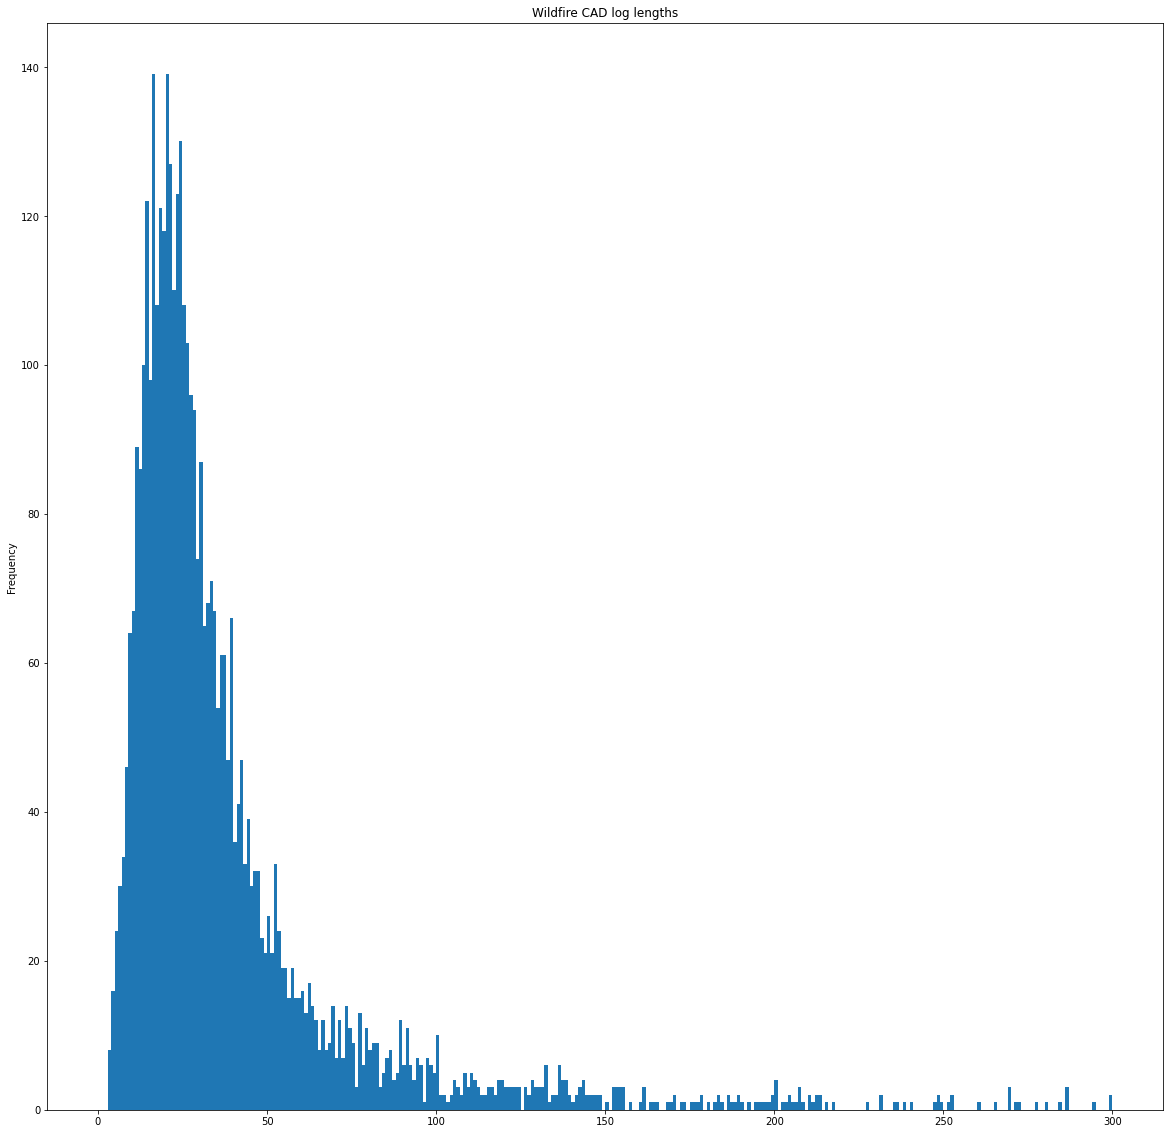

In [ ]:
wildfire_compiled['log_len'].plot(kind='hist', range=(0, 300), bins=300, figsize=(20,20), title='Wildfire CAD log lengths')

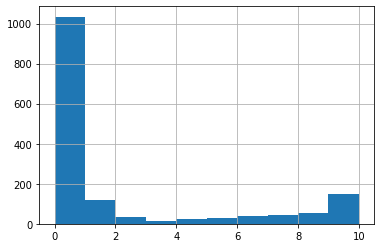

In [ ]:
wildfire_compiled['log_len'].hist(range=(0,10))

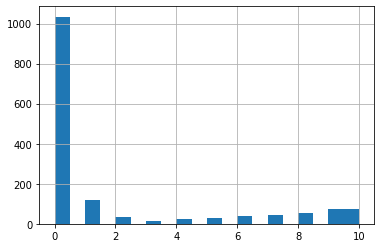

In [ ]:
wildfire_compiled['log_len'].hist(range=(0, 10), bins = 20)

In [ ]:
get_incident_df(21535).iloc[1]['Entry']

CURLEW KAI | 1111


'PER WFIS  TURNED OVER TO LANDOWNER  NOTICE TO COMPLY/EXTINGUISH ISSUED  MINIMAL SUPPRESSION COST'

In [ ]:
wildfire_compiled.query('jurisdiction == "LRP"')

,global_id,incident_name,incident_number,incident_year,incident_type,acres_final,log_len,general_cause,specific_cause,time_to_out,...,Helicopter,Handcrew,Module,Overhead,Dozer,Engine,Boat,Utility Vehicle,Tractor Plow,Watertender
1910,14836,BARNEYS - NC,609,2015,Wildfire,1.5,95,Miscellaneous,NaN,7.82,...,0,2,0,5,0,5,0,1,0,1
2389,18871,BISSELL CREEK,1358,2018,Wildfire,0.1,34,Lightning,NaN,5.84,...,0,0,0,1,0,2,0,0,0,0


In [ ]:
wildfire_compiled.dropna(lable='acres_final').sort_values(by='acres_final')

TypeError: ignored

In [ ]:
for column in wildfire_compiled.columns:
  print(column, '\n', wildfire_compiled[column].describe())

In [ ]:
wildfire_compiled.to_csv()

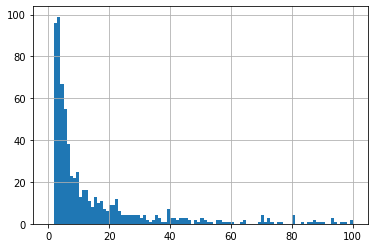

In [ ]:
large_fires['Acres'].hist(range=(0, 100), bins=100)

In [ ]:
print(dumps.keys())

dict_keys(['incident_ic', 'resource', 'placename', 'mileposts', 'incident', 'location', 'incident_center_fires', 'idl', 'hazards', 'fireinfo', 'daily_log', 'incident_log', 'incident_type', 'incident_sub_type', 'centerfire_subcats', 'spec_cause', 'stat_cause'])


In [ ]:
for log in dumps:
  print('##########', str.upper(log), '###########' '\n', dumps[log].head(20), '\n -----------------------------------------------')

###Not important

In [ ]:
dump_mileposts

,RoadName,MilePost,Lat,Lon
0,153,1,48.04741,119.9211
1,153,2,48.05414,119.9407
2,153,3,48.06529,119.9517
3,153,4,48.07620,119.9630
4,153,5,48.07598,119.9824
...,...,...,...,...
1785,97,333,48.95218,119.4405
1786,97,334,48.96582,119.4488
1787,97,335,48.97956,119.4529
1788,97,336,48.99358,119.4587


In [ ]:
dump_location

,LocationID,LocationCode,Describe,Lat,Lon,Decl,VOR,ATB,Lookout,Helibase
0,3367,ALM,ALMA HELIBASE,37.16667,121.9833,16.4,False,False,False,True
1,3369,APL,APPLE VALLEY HELIBASE,34.58333,117.1667,14.5,False,False,False,True
2,3371,ARG,ARROYO GRANDE HELIBASE,35.20000,120.4167,16.0,False,False,False,True
3,3372,AMH,ASH MT HELIBASE,36.57100,118.8250,15.0,False,False,False,True
4,3374,BAD,BALD MOUNTAIN HELIBASE,38.15000,120.0833,17.1,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
124,3586,S10,CHELAN,47.86594,119.9425,19.0,True,False,False,False
125,3587,DLS,THE DALLES,45.61845,121.1673,21.0,True,False,False,False
126,3588,2S8,WILBUR,47.75339,118.7439,21.0,True,False,False,False
127,3589,S97,BREWSTER,48.10473,119.7199,20.0,True,False,False,False


In [ ]:
dump_idl

,IDLID,IDLCode,Describe,Lat,Lon,Comment,AutoRoute,EarthUse
0,163,AIRHEIGHTS,Airway Heights,47.65080,117.5706,Home Location,NaN,NaN
1,164,LPO,Little Pend Oreille,48.46030,117.7805,Home Location,NaN,NaN
2,165,DEERPARK,Deer Park,47.95890,117.4609,Home Location,NaN,NaN
3,166,COLVILLE,Colville,48.54800,117.9041,Home Location,NaN,NaN
4,167,KETTLEFALLS,Kettle Falls,48.61200,118.0546,Home Location,NaN,NaN
5,168,REPUBLIC,Republic,48.65030,118.7409,Home Location,NaN,NaN
6,169,TONASKET,Tonasket,48.70550,119.4380,Home Location,NaN,NaN
7,170,OMAK,Omak,48.41130,119.5261,Home Location,NaN,NaN
8,171,NEWPORT,Newport,48.31610,117.2783,Home Location,NaN,NaN
9,172,LOOMIS,Loomis,48.81230,119.6319,Home Location,NaN,NaN


##USEFUL

###ID Tables

In [ ]:
dump_status

,StatusID,StatusCode,Describe,Sequence,Available,LineUpUse,DispatchUse,StatusUse,OnIncident,QBColor,Italics,StrikeThrough,GACCStatusCode,MustUse,Use
0,1,Available,Available,20,True,True,True,True,False,0,False,False,NaN,True,True
1,2,Responding,Responding,30,False,False,True,False,True,12,False,False,NaN,True,True
2,3,On Scene,On Scene,50,False,False,True,False,True,13,False,False,NaN,True,True
3,4,Returning,Returning,70,True,False,True,False,True,8,False,False,NaN,True,True
4,5,In Service,In Service,100,True,True,False,True,False,4,False,False,NaN,True,True
5,6,Out of Svc,Out of Service,120,False,True,False,True,False,6,False,False,NaN,True,True
6,7,Standby,Standing By,40,True,False,True,False,True,10,False,False,NaN,False,False
7,10,Delay30,Delayed Response,130,True,True,False,True,False,0,True,False,NaN,False,False
8,11,Avail Page,Available On Page,140,True,True,False,True,False,6,True,False,NaN,False,False
9,14,Avail Inc,Available At Incident,60,True,False,True,False,True,9,False,False,NaN,False,True


In [ ]:
dump_centerfire_cats.to_csv('centerfire_cats.csv')
!cp centerfire_cats.csv "drive/My Drive/NEWICC/"

In [ ]:
dump_incident_type

,IncidentTypeID,IncidentTypeCode,Describe,RespTypeID,Sequence,Include,QBColor,DragStatus,Freq1,Freq2,Freq3,NWCG_KC
0,1,NaN,(None),-1,-1,True,NaN,16.0,-1.0,-1.0,-1.0,NaN
1,2,Wildfire,Wildfire,4,1,True,4.0,2.0,-1.0,-1.0,-1.0,FIWF
2,3,Strc Fire,Structure Fire,4,2,True,NaN,2.0,-1.0,-1.0,-1.0,FISF
3,4,Veh Fire,Vehicle Fire,4,3,True,NaN,2.0,-1.0,-1.0,-1.0,FIVF
4,5,Smoke Chk,Smoke Check,4,4,True,1.0,2.0,-1.0,-1.0,-1.0,NaN
5,6,Med Aid,Medical Aid,6,5,True,NaN,16.0,-1.0,-1.0,-1.0,SRMA
6,7,Emerg Stby,Emergency Standby,-1,6,False,NaN,16.0,-1.0,-1.0,-1.0,NaN
7,8,Pub Asst,Public Assist,-1,7,False,NaN,16.0,-1.0,-1.0,-1.0,NaN
8,9,Law Enf,Law Enforcement,5,8,False,NaN,16.0,-1.0,-1.0,-1.0,NaN
9,10,Misc,Miscellaneous,-1,10,True,2.0,2.0,-1.0,-1.0,-1.0,NaN


In [ ]:
dump_incident_subtype

,IncidentSubTypeID,IncidentTypeID,Sequence,Describe
0,56,6,300,Entrapment
1,163,10,800,Law Enforcement
2,164,2,191,SPFN / DNR Statistical
3,165,2,192,SPKN / DNR Statistical
4,166,2,193,STCN / DNR Statistical
...,...,...,...,...
99,160,6,400,Injury Cooperator
100,161,11,100,Employee Non-injury
101,162,11,200,Private Non-Injury Assist
102,176,2,166,TBR / DNR Statistical


In [ ]:
for i in range(len(dump_incident_subtype)):
  row = dump_incident_subtype.iloc[i]
  print(row['IncidentSubTypeID'], row['Describe'])

In [ ]:
valid_subtypes = []

for i in range(len(dump_incident_subtype)):
  row = dump_incident_subtype.iloc[i]
  if 'DNR Statistical' in row['Describe']:
    valid_subtypes.append(row['IncidentSubTypeID'])
    print(row['IncidentSubTypeID'], row['Describe'])

In [ ]:
dump_stat_cause

,StatCauseID,Describe
0,0,NaN
1,1,Lightning
2,2,Equipment Use
3,3,Smoking
4,4,Campfire
5,5,Debris Burning
6,6,Railroad
7,7,Arson
8,8,Children
9,9,Miscellaneous


In [ ]:
dump_spec_cause

,SpecCauseID,Describe
0,0,NaN
1,1,Lightning
2,2,Aircraft
3,3,Burning Vehicle
4,4,Exhaust-Powersaw
5,5,Exhaust-Other
6,6,Logging Line
7,7,Brakeshoe
8,8,Cooking Fire
9,9,Warming Fire


###status_history

In [ ]:
dump_status_history

,StatusHistoryID,ResourceID,StatusDate,StatusID,IncidentID,IDLID,DispatcherID,Describe
0,82591,11,2011-04-07 14:35:22,16,4159,-1,29,4/7/2011 2:35:22 PM
1,82592,527,2011-04-07 14:35:29,16,4159,-1,29,4/7/2011 2:35:29 PM
2,82593,11,2011-04-07 14:35:31,2,4159,-1,29,4/7/2011 2:35:31 PM
3,82594,527,2011-04-07 14:35:31,2,4159,-1,29,4/7/2011 2:35:31 PM
4,82597,527,2011-04-07 15:06:10,3,4159,-1,29,4/7/2011 3:06:10 PM
...,...,...,...,...,...,...,...,...
479885,704301,1535,2022-06-26 10:29:25,5,0,195,199,34/39/16
479886,704317,1696,2022-06-26 12:24:15,5,-1,214,199,+3 40/28-29
479887,704319,1535,2022-06-26 12:28:26,5,0,195,199,@ COLVILLE COMPOUND
479888,704320,1533,2022-06-26 12:29:04,5,0,196,199,@ COLVILLE COMPOUND


###fireinfo

In [ ]:
for column in dump_fireinfo.columns:
  print(column)

IncidentID
FireNum
SubUnitCode
SizeClass
Acres
LandStatus
Wilderness
StatCauseID
SpecCauseID
SubUnitFireNum
ContainDate
ControlDate
OutDate
IFuels
IAcres
IWSpeed
IWDir
ISlope
IAspect
ISpread
IStructures
Elevation
IJurisdiction
IComplexity
IAccess
IHazards
InitialStrategyID
LastUpdate


In [ ]:
print(dump_fireinfo.query("IncidentID == @test"))

In [ ]:
dump_incident.query("IncidentID == 17445")

,IncidentID,IncidentYear,IncidentNum,IncidentTypeID,IncidentDate,IncidentJulian,AreaID,Lat,Lon,Location,...,AZSendID,ComplexParentIRWINID,UFID,GetIRWIN,abcdMisc,GetUpdates,ConflictParentIRWINID,ADSPermissionState,JurisdictionalUnit,LandownerCategory
10725,17445,2017,1167,2,2017-06-20 14:57:00,NaN,-1.0,48.31781,118.0943,STEVENS COUNTY - ADDY GIFFORD ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEFAULT,NaN,NaN


In [ ]:
get_incident_df(17445)

BECK ROAD | 1167


,LogDate,LogFrom,LogTo,Entry
0,2017-06-20 15:02:42,MG,UNITS,FIRE ADDY GIFFORD POWER OUT AT 13691 BECK ROAD...
1,2017-06-20 15:03:13,NC 347,MG,RESPONDING 5 MIN ETA
2,2017-06-20 15:03:31,NC 324,MG,RESPONDING WITH 25 MIN ETA
3,2017-06-20 15:03:41,NC DO,MG,COPY DIRECT
4,2017-06-20 15:07:13,CR,AVISTA,PARTIES ON ADDY-GIFFORD REPORTING OUTAGES WE ...
...,...,...,...,...
202,2017-06-23 16:19:18,NC 347,TL FC,3 HRS TO CREW OF 2 AND FOUND 1 SMOKE
203,2017-06-24 13:52:45,NC 324,TL FC,2 HR TO A CREW OF 2 0
204,2017-06-25 18:17:16,NC 326,CR FC,CHG 2 HRS 0 SMOKES C/2
205,2017-06-29 10:39:38,NC 347,JS FC,2 HRS F/C 0 S


In [ ]:
count_response(17445)

Engine        8
Handcrew      4
Overhead      1
Helicopter    1
Name: ResourceType, dtype: int64

In [ ]:
incident_duration(17445)

{'days': 13, 'hours': 23.95}

###indicent_center_fires

In [ ]:
dump_incident_center_fires.dropna()

,IncidentID,CenterFireTabID,CenterFireCatID,Describe
0,3315,2,4,7/2/11 HF
1,3315,2,5,7/3/11 JF
2,4102,2,1,11/1/10
7,4125,2,3,7/9/11 CK
20,4156,1,1,3/23/11 1430
...,...,...,...,...
147676,24249,2,2,9 - Miscellaneous
147677,24249,2,3,9-Power line
147678,24249,2,8,DNR Assist OthAgency
147679,24249,2,13,WA Fire Service


In [ ]:
for column in dump_incident_center_fires.columns:
  print(column)

IncidentID
CenterFireTabID
CenterFireCatID
Describe


In [ ]:
x = dump_incident_center_fires.query("IncidentID == 18745")

'''
for i in range(len(x)):
  row = x.iloc[i]
'''

len(x)

30

In [ ]:
dump_incident_center_fires.query("IncidentID == @test")

,IncidentID,CenterFireTabID,CenterFireCatID,Describe
85519,17445,1,1,6/20/17 @ 1430
85522,17445,1,2,9-Power Line
100925,17445,1,4,DNR & Other Agencies
100926,17445,1,14,18 HAND 18 DOZER
100941,17445,1,7,Resident
100968,17445,1,6,No
100969,17445,1,5,No
100970,17445,1,15,686
100971,17445,1,17,2
100972,17445,1,16,1


###placename

In [ ]:
dump_placename

,PlaceNameID,Describe,Lat,Lon,ImageFile,Township,TownshipNS,Range,RangeEW,Section
0,1,Albeni Cove [ID-Bonner],48.17560,117.1208,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Albeni Falls [ID-Bonner],48.17780,117.0003,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Albeni Falls Creek [ID-Bonner],48.18280,117.1264,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Albeni Falls Dam [ID-Bonner],48.18000,117.0000,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Athol Creek [ID-Bonner],48.69080,117.0006,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9271,9293,Liberty Lake Regional Park Campgrou,47.63177,117.0576,NaN,NaN,NaN,NaN,NaN,NaN
9272,9294,Ponderosa Campground [WA-Lincoln],47.94020,118.2163,NaN,NaN,NaN,NaN,NaN,NaN
9273,9295,Pend Oreille County Park [WA-Pend O,48.08092,117.3251,NaN,NaN,NaN,NaN,NaN,NaN
9274,9301,Harts Pass Campground [WA-Okanogan],48.72031,120.6696,NaN,NaN,NaN,NaN,NaN,NaN


###resource

In [ ]:
dump_resource

,ResourceID,ResourceCode,IIAACode,Describe,AgencyID,IDLID,CDPGroupID,ImageFile,Dispatch,Comment,...,AdminSequence,WildShare,Lat,Lon,GroupID,KCTID,IrwinRID,CapabilityRequestID,IRWINCRID,IRWINID
0,1,HI 121,NaN,,1,140,20,NaN,NaN,HOME DL - OROVILLE UPD 4/4/13 HL,...,NaN,0,NaN,NaN,-1.0,0,NaN,NaN,NaN,NaN
1,2,HI 122,NaN,Scriver,1,169,20,NaN,NaN,UPD 6/18/18,...,NaN,0,NaN,NaN,-1.0,56,NaN,NaN,NaN,NaN
2,3,AR 37,NaN,Leyva,1,47,27,NaN,NaN,HOME DL - DEER PARK PURGING FOR 2015 FIRE SEAS...,...,NaN,0,NaN,NaN,-1.0,19,NaN,NaN,NaN,NaN
3,4,HI 124,NaN,SPARE,1,169,20,NaN,NaN,A1S-9099 UPD 7/15/16 CAR,...,NaN,0,NaN,NaN,-1.0,34,NaN,NaN,NaN,NaN
4,5,HI 144,NaN,Graham T,1,168,20,NaN,NaN,TOM GRAHAM ENG CELL: 690-8432 H4S-0011 UPD 5/...,...,NaN,0,NaN,NaN,-1.0,53,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,1955,T 104,NaN,TANKER,1,210,19,NaN,NaN,NaN,...,NaN,0,NaN,NaN,-1.0,0,NaN,NaN,NaN,NaN
2004,1956,AA 78NA,NaN,Air Attack Platform,1,165,19,NaN,NaN,NaN,...,NaN,0,NaN,NaN,-1.0,0,NaN,NaN,NaN,NaN
2005,1957,AA 104/80G,NaN,Air Attack Platform,1,166,19,NaN,NaN,NaN,...,NaN,0,NaN,NaN,-1.0,0,NaN,NaN,NaN,NaN
2006,1964,H 625CK,NaN,Rotor,1,174,19,NaN,NaN,NaN,...,NaN,0,NaN,NaN,-1.0,0,NaN,NaN,NaN,NaN


In [ ]:
for column in dump_resource.columns:
  print(column, ':', dump_resource.query('ResourceID == 80')[column].values[0])

ResourceID : 80
ResourceCode : HI 31
IIAACode : nan
Describe : ST Up Forester 2
AgencyID : 1
IDLID : 172
CDPGroupID : 25
ImageFile : nan
Dispatch : nan
Comment : SKYLAR GOODRICH - W: 322-6610; P: 429-5849 UPD 7/7/21 VR
Sequence : 1
StatusGroupID : 2
StatusID : 6
StatusDate : 2022-06-08 16:30:16
IncidentID : 0
HomeIDLID : 172
ForeignResource : False
LineUpSequence : 31
GACCID : nan
OnIncRep : True
APRS : False
APRSCode : nan
GACCStatusID : 0
Purged : False
WildWeb : True
FIFIle : False
AdminSequence : nan
WildShare : 0
Lat : nan
Lon : nan
GroupID : -1.0
KCTID : 36
IrwinRID : nan
CapabilityRequestID : nan
IRWINCRID : nan
IRWINID : nan


In [ ]:
dump_resource['HomeIDLID'].unique() #- dump_resource['IDLID'].unique()

array([140, 169,  47, 168,  36,  58,  57, 165, 170, 172,  10, 166, 155,
        83,  80,  42, 167,  95,  84,  37, 163, 154,  15, 133,  55,  62,
        29,  85,  52,  51,  60,   6, 173, 171, 162, 164, 156,  78,  87,
       151,  75,  43, 158,  13, 208, 191,  12,  25, 183, 174,  41, 182,
       152, 138,  89,  34,  61, 205,  32,  98, 186, 211, 147,  81,  28,
       212, 199, 201, 206, 184, 192, 196, 195, 202, 188, 193, 189, 194,
       214, 187, 210, 213, 181, 207, 200, 209])

In [ ]:
dump_resource['IDLID'].unique()

array([140, 169,  47, 168,  36,  58,  57, 165, 170, 172,  10, 166, 195,
        83,  80,  42, 167,  95,  84,  37, 163, 154,  15, 133,  55,  62,
        29,  85,  52,  51,  60,   6, 173, 171, 162, 164, 156,  78,  87,
       151,  75, 155,  43, 158,  13, 208, 191,  12,  25, 183, 174,  41,
       182, 152, 138,  89,  34,  61, 205,  32,  98, 186, 211, 147,  81,
        28, 212, 199, 201, 206, 184, 192, 196, 202, 188, 193, 189, 194,
       214, 187, 210, 213, 200, 181, 207, 209])

In [ ]:
dump_resource.query('IDLID == 195')

,ResourceID,ResourceCode,IIAACode,Describe,AgencyID,IDLID,CDPGroupID,ImageFile,Dispatch,Comment,...,AdminSequence,WildShare,Lat,Lon,GroupID,KCTID,IrwinRID,CapabilityRequestID,IRWINCRID,IRWINID
25,26,H 341,NaN,Type 2 Huey,1,195,19,NaN,NaN,"Bell UH-1H ""Huey"" -- Registration: N341WN -...",...,NaN,0,NaN,NaN,-1.0,9,NaN,NaN,NaN,NaN
1416,1535,NC 7307,NaN,Engine Type 5,1,195,22,NaN,NaN,COLE STOOP ENGB - W/ DYLAN BALAURO RACHEL JA...,...,NaN,0,NaN,NaN,-1.0,55,NaN,NaN,NaN,NaN
1767,1902,H 1GH,NaN,ROTOR,1,195,19,NaN,NaN,7/18/21 TL,...,NaN,0,NaN,NaN,-1.0,0,NaN,NaN,NaN,NaN
2001,1953,H 0HA,NaN,ROTOR,1,195,19,NaN,NaN,NaN,...,NaN,0,NaN,NaN,-1.0,0,NaN,NaN,NaN,NaN


In [ ]:
for column in dump_resource.columns:
  print(column)

ResourceID
ResourceCode
IIAACode
Describe
AgencyID
IDLID
CDPGroupID
ImageFile
Dispatch
Comment
Sequence
StatusGroupID
StatusID
StatusDate
IncidentID
HomeIDLID
ForeignResource
LineUpSequence
GACCID
OnIncRep
APRS
APRSCode
GACCStatusID
Purged
WildWeb
FIFIle
AdminSequence
WildShare
Lat
Lon
GroupID
KCTID
IrwinRID
CapabilityRequestID
IRWINCRID
IRWINID


###daily_log

In [ ]:
dump_daily_log

,DailyLogID,DailyLogDay,DailyLogDate,IncidentID,ResourceID,DispatcherID,StatusID,Describe,Highlight,LogFrom,LogTo,DailyLogCatID,ActionNeeded
0,99332,20101230,2010-12-30 07:55:57,-1,-1,3,-1,NE IN SERVICE & PHONES SWITCHED,False,NaN,NaN,1.0,False
1,99333,20101230,2010-12-30 16:27:24,-1,-1,3,-1,NE OUT OF SERVICE & PHONES SWITCHED,False,NaN,NaN,1.0,False
2,99334,20110103,2011-01-03 07:56:27,-1,-1,3,-1,NE IN SERVICE - PHONES SWITCHED,False,NaN,NaN,1.0,False
3,99335,20110103,2011-01-03 16:27:05,-1,-1,3,-1,NE OUT OF SERVICE - PHONES SWITCHED,False,NaN,NaN,1.0,False
4,99336,20110104,2011-01-04 08:21:44,4122,-1,2,-1,NaN,False,NaN,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551002,654866,20211025,2021-10-25 09:50:40,24745,1896,113,2,3R RX - SHERMAN EAST,NaN,NaN,NaN,1.0,NaN
551003,654849,20211025,2021-10-25 08:44:54,23085,528,181,2,REP RX - SHERMAN,NaN,NaN,NaN,1.0,NaN
551004,654864,20211025,2021-10-25 09:49:54,23085,528,181,3,REP RX - SHERMAN,NaN,NaN,NaN,1.0,NaN
551005,654867,20211025,2021-10-25 09:55:56,23085,126,181,2,REP RX - SHERMAN,NaN,NaN,NaN,1.0,NaN


###incident_ic

In [ ]:
dump_incident_ic

,ICID,IncidentID,ICDate,ICName,ICEffective,DispatcherID,ICComment,IsTrainee
0,2142,4156,2011-03-24 10:24:51,Smith Ryan - NC 26,Arrival,29.0,NaN,False
1,2143,4158,2011-04-04 11:28:42,KINKADE MARK,ARRIVAL,29.0,HI 40,False
2,2144,4159,2011-04-07 15:37:32,MORGAN JOHN,ARRIVAL,29.0,SO 224,False
3,2145,4165,2011-04-11 11:23:33,MILLER STEVE,ARRIVAL,7.0,NaN,False
4,2146,4163,2011-04-11 13:07:57,ENGLISH JACK,ARRIVAL,7.0,NaN,False
...,...,...,...,...,...,...,...,...
11983,230590,24623,2021-08-31 00:06:37,WOODLAND COLLIN,ARRIVAL,114.0,7408,False
11984,230591,24623,2021-08-31 00:06:54,MONTGOMERY STEPHEN,ARRIVAL,114.0,7408,True
11985,230592,24626,2021-08-31 02:45:23,WALTERS GARRETT,ARRIVAL,114.0,7406,False
11986,240462,24639,2021-09-02 23:04:30,CERENZIA KYLE,ARRIVAL,114.0,7405,False


###incident_log

In [ ]:
dump_incident_log.query('IncidentID == 17458')

,IncidentLogID,IncidentID,LogDate,LogFrom,LogTo,Describe,IsStrikeThrough,CatID,SubCatID
188710,310288,17458,2017-06-23 14:32:13,CS,AR DO,REPORT OF FIRE ON TOP OF EGYPT LOOP ROAD NORT...,False,NaN,NaN
188711,310289,17458,2017-06-23 14:32:26,TA,UNITS,AR 443 AND AR 449 PLEASE RESPOND TO INC 1180/ ...,False,NaN,NaN
188712,310290,17458,2017-06-23 14:32:55,AR 20,AR DO,CAN ADD ANOTHER OH IF YOU LIKE//YES PLEASE//COPY,False,NaN,NaN
188713,310291,17458,2017-06-23 14:33:16,AR DO,TA,ADDL AR 29 RESPONDING FROM DEER PARK,False,NaN,NaN
188714,310292,17458,2017-06-23 14:36:21,AR 29,TA,EN ROUTE 1 HOUR 30 MIN ETA,False,NaN,NaN
188826,310306,17458,2017-06-23 14:55:56,AR 20,MG,FD HAS FIRE KNOCKED DOWN A LITTLE SPOT HAVE 1 ...,False,NaN,NaN
188827,310307,17458,2017-06-23 14:57:03,MG,AR 449,WILL CONTINUE TO INC,False,NaN,NaN
188828,310308,17458,2017-06-23 14:57:42,AR 443,MG,WILL DISREGUARD,False,NaN,NaN
188829,310309,17458,2017-06-23 14:58:53,AR DO,AR 449,BEST ACCESS IS OFF EGYPT LOOP ROAD,False,NaN,NaN
188858,310296,17458,2017-06-23 14:39:48,AR DO,TA,CHECKING ON AVAILABILITY OF AIRCRAFT/HELICOPTE...,False,NaN,NaN


In [ ]:
for column in dump_incident_log.columns:
  print(column)

IncidentLogID
IncidentID
LogDate
LogFrom
LogTo
Describe
IsStrikeThrough
CatID
SubCatID


In [ ]:
dump_incident_log['IncidentID'].value_counts()[800:]

21376    78
19166    78
20919    78
14741    78
20724    77
         ..
23326     1
16765     1
16767     1
16041     1
24841     1
Name: IncidentID, Length: 13813, dtype: int64

###Incident Columns

In [ ]:
dump_incident.query("IncidentID == 17458")['Describe']

10741    IFPL: 686  County: LINCOLN   AR 27 ROBBY BOLES
Name: Describe, dtype: object

In [ ]:
dt.strptime(dump_incident.query("IncidentID == 17458")['IncidentDate'].values[0], '%Y-%m-%d %H:%M:%S').year

2017

In [ ]:
print(dump_incident.columns)

Index(['IncidentID', 'IncidentYear', 'IncidentNum', 'IncidentTypeID',
       'IncidentDate', 'IncidentJulian', 'AreaID', 'Lat', 'Lon', 'Location',
       'IncidentStatusID', 'InitialReport', 'Describe', 'RespLevelID',
       'ReportingParty', 'CloseDate', 'Township', 'TownshipNS', 'Range',
       'Section', 'BaseMeridian', 'LastUpdate', 'MgtCodePrefix',
       'DispatcherID', 'WebComment', 'NoWildComm', 'MgtCodeNumber', 'RangeEW',
       'SubSection', 'IncidentSubTypeID', 'IDLID', 'Duration',
       'UnifiedCommand', 'Reimbursable', 'ActualLocation',
       'ActualLocationDate', 'ActualLat', 'ActualLon', 'ActualTownship',
       'ActualTownshipNS', 'ActualRange', 'ActualRangeEW', 'ActualSection',
       'ActualSubSection', 'WFDSSDate', 'wID', 'SWFRSDate', 'SWFRSDispatcher',
       'SWFRSComment', 'TFR', 'Reload_Base', 'Hazards', 'MTRSUA',
       'ResOrderNum', 'AgencyCode', 'HeaderLock', 'OtherAC', 'GroundContact',
       'IncidentName', 'AZFiscalNum', 'AZFiscalUnit', 'AZFiscalDisp',
 

In [ ]:
for column in dump_incident.columns:
  print(column)
  #test[column]

IncidentID
IncidentYear
IncidentNum
IncidentTypeID
IncidentDate
IncidentJulian
AreaID
Lat
Lon
Location
IncidentStatusID
InitialReport
Describe
RespLevelID
ReportingParty
CloseDate
Township
TownshipNS
Range
Section
BaseMeridian
LastUpdate
MgtCodePrefix
DispatcherID
WebComment
NoWildComm
MgtCodeNumber
RangeEW
SubSection
IncidentSubTypeID
IDLID
Duration
UnifiedCommand
Reimbursable
ActualLocation
ActualLocationDate
ActualLat
ActualLon
ActualTownship
ActualTownshipNS
ActualRange
ActualRangeEW
ActualSection
ActualSubSection
WFDSSDate
wID
SWFRSDate
SWFRSDispatcher
SWFRSComment
TFR
Reload_Base
Hazards
MTRSUA
ResOrderNum
AgencyCode
HeaderLock
OtherAC
GroundContact
IncidentName
AZFiscalNum
AZFiscalUnit
AZFiscalDisp
AZFiscalDate
CenterIsResponsible
IncidentIMT
AZSendDate
AZSendDisp
DiscAcres
FSJobCode
FireCode
FSOverride
FiscalComments
StateFiscalCode
OtherFiscalCode
FSAssisted
MultiJurisdictional
Trespass
iID
ComplexStatus
ComplexParentID
IRWINStatus
IRWINlook
FireCodeRequest
ConflictStatus
AZSe

#TOKENIZE INCIDENT LOG

In [ ]:
dump_incident[dump_incident['IncidentYear'] == 2015]['IncidentNum'].value_counts()

1456    5
1492    5
284     4
1516    3
1694    3
       ..
816     1
815     1
282     1
281     1
1692    1
Name: IncidentNum, Length: 1696, dtype: int64

In [ ]:
dump_

#- Clean IncidentLog


In [ ]:
cam_log = log.query('LogTo == "CK" or LogFrom == "CK"')
cam_log

,IncidentLogID,IncidentID,LogDate,LogFrom,LogTo,Describe,IsStrikeThrough,CatID,SubCatID
522,55129,4216,2011-05-16 15:35:36,CK,241,PLEASE CALL IN WITH THE REST OF THE FIRE REPOR...,False,0.0,0.0
524,55131,4216,2011-05-16 15:45:48,SO 241,CK,RAN ON A FALSE ALARM ON SATURDAY - NAME WILL B...,False,0.0,0.0
639,55259,4225,2011-05-21 09:10:40,DV3,CK,MYSELF + PROFFITT ENROUTE TO THIS INCIDENT,False,0.0,0.0
642,55262,4225,2011-05-21 11:38:16,PROFFITT,CK,STARTING TEST FIRE AT THIS TIME - HICKS WILL B...,False,0.0,0.0
643,55263,4225,2011-05-21 11:43:41,PROFFITT,CK,test ignition completed and beginning ignition,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...
385922,510660,24833,2021-10-20 10:06:21,CK,LOG,RECIEVED SZUP + PARTS VIA EMAIL,False,NaN,NaN
385942,510785,23088,2021-10-21 11:32:16,TBR DO,CK,CONDITIONS LOOKING TOO WET WILL ATTEMPT TEST ...,False,NaN,NaN
385943,510794,23023,2021-10-21 13:00:35,LT 32,CK,DEPARTING C 301 WILL REMAIN ON SCENE TO OBSERVE,False,NaN,NaN
385944,510814,24744,2021-10-21 14:56:40,IC,CK,IGNITIONS COMPLETE 130 ACRES ALL RESOURCES CLEAR,False,NaN,NaN


In [ ]:
log[log['IncidentID'] == 24364].sort_values(by='IncidentLogID', axis=0).head(30)

,IncidentLogID,IncidentID,LogDate,LogFrom,LogTo,Describe,IsStrikeThrough,CatID,SubCatID
378136,491024,24364,2021-08-04 12:48:58,AA 44F,TL,T38 R24 S26 48 45.78 119 47.20 ROAD ACCESS AN...,False,NaN,NaN
378141,491051,24364,2021-08-04 13:05:17,VR,WZ DO,RELAYED TO WZ DO,False,NaN,NaN
378145,491057,24364,2021-08-04 13:06:35,WZ DO,VR,TALK TO AIR DESK SEE IF THEY HAVE ANYTHING TO...,False,NaN,NaN
378233,491067,24364,2021-08-04 13:14:35,WZ DO,HI 7104,WILL TRY TO BREAK SOMEONE AWAY TO SEND TO THIS...,False,NaN,NaN
378241,491084,24364,2021-08-04 13:22:10,HI 60,JB,ENR 1 HR 20 MIN ETA,False,NaN,NaN
378251,491105,24364,2021-08-04 13:37:23,JB,WZ DO,WEST UP 10 ENR // AFFRIM,False,NaN,NaN
378252,491106,24364,2021-08-04 13:38:29,JB,WZ DO,EQUIP IN AREA RELAYED PHONE NUMBERS,False,NaN,NaN
378259,491123,24364,2021-08-04 13:49:14,HS,JEFF,WOULD LIKE 0CB FOR THIS INCIDENT?// OK I WILL ...,False,NaN,NaN
378269,491135,24364,2021-08-04 13:58:03,WZ DO,HP,WUP 10 LOOKING FOR AIRCRAFT FIRE IS RUNNING ...,False,NaN,NaN
378270,491136,24364,2021-08-04 13:58:05,JB,LOG,TIMBERLINE DOZER ENR AND WILL TIE IN W WEST UP 10,False,NaN,NaN


In [ ]:
cam_log['IncidentID'].value_counts()

24364    297
24406    167
24513    148
4232     133
24295    113
        ... 
11342      1
11194      1
11035      1
11067      1
23088      1
Name: IncidentID, Length: 1053, dtype: int64

cam_log[

In [ ]:
x = log['LogFrom'].value_counts()[:20]
y = log['LogTo'].value_counts()[:20]

CR: 26825


CR       20405
HL       18144
JF       15395
VR       14257
TA       14087
JS       11328
JJ       10189
CH        9921
LOG       9645
EG        7894
TG        7330
KTG       6971
TL        6396
HML       6175
HS        6073
PF        6049
CK        5872
LK        5615
Email     5414
IC        5268
Name: LogTo, dtype: int64

In [ ]:
x

IC         37933
JJ          9025
AR DO       6474
CR          6420
HL          5079
ICT         4397
JF          4118
VR          4071
IC          3451
JS          3426
AR 62       3078
AR 61       2936
IC-T        2684
DO          2638
RECON 1     2508
NC 61       2420
TA          2412
NC 62       2392
AR 63       2325
HS          2250
Name: LogFrom, dtype: int64

##- LogDate

In [ ]:
log['LogDate'][0]

0         2011-01-04 10:43:18
1         2011-01-04 10:51:36
2         2011-01-04 11:01:23
3         2011-01-04 11:12:48
4         2011-01-04 11:23:48
                 ...         
386024    2021-10-25 08:16:21
386025    2021-10-25 08:24:15
386026    2021-10-25 09:06:27
386027    2021-10-25 09:27:36
386028    2021-10-25 10:29:04
Name: LogDate, Length: 386029, dtype: object

In [ ]:
type(log['LogDate'][0]) #convert to datetime object

str

In [ ]:
from dateutil import parser
for i in log['LogDate'].index:
  print(log['LogDate'].at[i])
  log['LogDate'].at[i] = parser.parse(log['LogDate'][i])

# x = parser.parse(log['LogDate'][0])


In [ ]:
log['LogDate'].str.find('2020-08-12 12:19:10') == 1

0         False
1         False
2         False
3         False
4         False
          ...  
386024    False
386025    False
386026    False
386027    False
386028    False
Name: LogDate, Length: 386029, dtype: bool

##- LogFrom/LogTo

In [ ]:
x.date()

datetime.date(2011, 1, 4)

In [ ]:
example = log['Describe'][3]


In [ ]:
def find_abbreviation(text):
  try: 
    tokens = text.split(' ')
    abbreviation_list = []
    for token in tokens:
      if str.isupper(token):
        abbreviation_list.append(token)
    return abbreviation_list
  except:
    return []  

In [ ]:
x = []
len(x)

0

In [ ]:
abbreviations = ['']
for text in log['Describe']:
  abbrv = find_abbreviation(text)
  if len(abbrv) > 0:
    abbreviations.append(abbrv)

In [ ]:
x = []
x.append([''])

In [ ]:
exlist = example.split(' ')
exlist[3]

str.isupper('O/S')

True

#MAP CODE

In [ ]:
from pykml import parser
from lxml import etree

In [ ]:
kml_file = '/content/drive/MyDrive/NEWICC/EarthPointTownships_220025.kml'
with open(kml_file) as f:
  doc = parser.parse(f).getroot()

In [ ]:
root = doc.getroot()

In [ ]:
etree.tostring(root)

b'<kml xmlns="http://www.opengis.net/kml/2.2" xmlns:gx="http://www.google.com/kml/ext/2.2"><NetworkLink><name>Earth Point Townships</name><Snippet maxLines="1"><![CDATA[<span style=\'color: Black;\'>Download in progress. Please wait...</span>]]></Snippet><description>Download in progress. Please wait...</description><refreshVisibility>1</refreshVisibility><open>1</open><Link><href>http://www.earthpoint.us/Default.ashx?RequestID=824374316e734db3b473d92f81d2cfda</href><viewRefreshMode>onStop</viewRefreshMode><viewRefreshTime>3</viewRefreshTime><viewBoundScale>1</viewBoundScale><viewFormat>BBOX=[bboxWest],[bboxSouth],[bboxEast],[bboxNorth],[lookatLon],[lookatLat],[lookatRange],[lookatTilt],[lookatHeading],[lookatTerrainAlt],[horizPixels],[vertPixels],[terrainEnabled]</viewFormat></Link></NetworkLink></kml>'

In [ ]:
x = doc.getchildren()

In [ ]:
len(x)

1